In [1]:
from keras.applications import vgg16

Using TensorFlow backend.


In [2]:
from keras.layers import Dense, MaxPooling2D, Flatten

In [3]:
#VGG-16 needs 224 x 224 pixels as input
img_rows, img_cols = 224, 224

#Reloading VGG-16 model without the top or FC layer
model = vgg16.VGG16(weights='C:/Users/KIIT/Desktop/murgi/vgg.h5',
                    include_top = False,
                   input_shape = (img_rows, img_cols,3))


#Freeze all layers
for layer in model.layers:
    layer.trainable = False

#lets print our layers
for (i, layer) in enumerate(model.layers):
    print(str(i) + " " + layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [4]:
def VGGFC(bottom_model, num_class):
    '''
    creates the top or head of the model which 
    will be placed on top of the bottom layers
    '''
    
    top_model = bottom_model.output
    top_model = Flatten(name= 'flatten')(top_model)
    top_model = Dense(units= 4096, activation= 'relu')(top_model)
    top_model = Dense(units=4096, activation='relu')(top_model)
    top_model = Dense(units= 1024, activation= 'relu')(top_model)
    top_model = Dense(units= num_class, activation='sigmoid')(top_model)
    return top_model


In [5]:
from keras.models import Model

In [6]:
num_class = 2

In [7]:
FC_head = VGGFC(model, num_class= num_class)

In [8]:
newmodel = Model(inputs= model.input, outputs= FC_head)

In [9]:
newmodel.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [10]:
from keras.preprocessing import image

In [11]:
trdata = image.ImageDataGenerator()
tstdata = image.ImageDataGenerator()

In [12]:
train_data = trdata.flow_from_directory('C:/Users/KIIT/Desktop/.png_train/', target_size=(img_rows, img_cols))
test_data = tstdata.flow_from_directory('C:/Users/KIIT/Desktop/.png_test/', target_size=(img_rows, img_cols))

Found 159 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [13]:
test_data.class_indices

{'sap': 0, 'sara': 1}

In [14]:
train_data.class_indices

{'sap': 0, 'sara': 1}

In [15]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [16]:
es = EarlyStopping(monitor='val_accuracy',verbose=1, patience=5,restore_best_weights=True )

mc = ModelCheckpoint('C:/Users/KIIT/Desktop/murgi/FCmodel123.h5',monitor='val_accuracy',
                     verbose=1, save_best_only=True )
cb_list = [es, mc]

In [17]:
from keras.losses import binary_crossentropy
from keras.optimizers import Adam

In [18]:
newmodel.compile(loss=binary_crossentropy, optimizer=Adam(), metrics=['accuracy'])

In [19]:
history = newmodel.fit_generator(generator=train_data,
                                epochs=10,
                                validation_data=test_data,
                                callbacks=cb_list)

Epoch 1/10
5/5 [==============================] - 53s 11s/step - loss: 60.7475 - accuracy: 0.5597 - val_loss: 1.6593 - val_accuracy: 0.9333

Epoch 00001: val_accuracy improved from -inf to 0.93333, saving model to C:/Users/KIIT/Desktop/murgi/FCmodel123.h5
Epoch 2/10
5/5 [==============================] - 47s 9s/step - loss: 2.9356 - accuracy: 0.8962 - val_loss: 12.0975 - val_accuracy: 0.7000

Epoch 00002: val_accuracy did not improve from 0.93333
Epoch 3/10
5/5 [==============================] - 48s 10s/step - loss: 0.4946 - accuracy: 0.9654 - val_loss: 4.8201 - val_accuracy: 0.9000

Epoch 00003: val_accuracy did not improve from 0.93333
Epoch 4/10
5/5 [==============================] - 48s 10s/step - loss: 1.5478e-05 - accuracy: 1.0000 - val_loss: 0.8412 - val_accuracy: 0.9667

Epoch 00004: val_accuracy improved from 0.93333 to 0.96667, saving model to C:/Users/KIIT/Desktop/murgi/FCmodel123.h5
Epoch 5/10
5/5 [==============================] - 48s 10s/step - loss: 0.0587 - accuracy: 0.

In [20]:
import pandas as pd

In [21]:
df_loss = pd.DataFrame(history.history)

In [22]:
df_loss

,val_loss,val_accuracy,loss,accuracy
0,1.659319,0.933333,6.022918e+01,0.559748
1,12.097536,0.700000,2.927613e+00,0.896226
2,4.820092,0.900000,4.933768e-01,0.965409
3,0.841229,0.966667,1.555684e-05,1.000000
4,0.152960,0.966667,5.902181e-02,0.996855
5,3.953018,0.900000,1.143654e-02,0.996855
6,10.493670,0.866667,1.850964e-32,1.000000
7,15.486696,0.866667,6.856202e-32,1.000000
8,18.928564,0.866667,7.259707e-30,1.000000


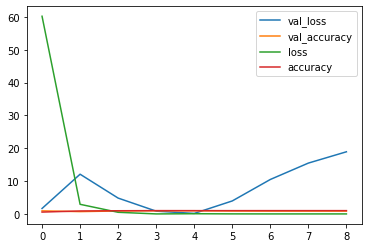

In [23]:
df_loss.plot()